# Visualising high-dimensional Ludeme datasets using PCA and t-SNE in Python

This notebook is based on Ludeme Dataset:
[Link](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b) and [link](https://github.com/olekscode/Examples-PCA-tSNE/blob/master/Python/Visualizing%20Iris%20Dataset%20using%20PCA%20and%20t-SNE.ipynb). Follow up on this paper: https://arxiv.org/pdf/2105.12846.pdf

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [87]:
PALETTE = sns.color_palette('deep', n_colors=2)
CMAP = ListedColormap(PALETTE.as_hex())

In [8]:
RANDOM_STATE = 42

## Loading the dataset from

In [106]:
df = pd.read_csv("../data/rulesetLudemes.csv")
print('Size of the dataframe: {}'.format(df.shape))
inputFeatures = df.iloc[:,1:]
X = df.iloc[:, 4:].values
# inputFeatures
firstColumn = df.iloc[:, 0]
firstColumn

Size of the dataframe: (766, 552)


0         7
1      1233
2         8
3       669
4       319
       ... 
761    1145
762     404
763      37
764    1129
765     873
Name: GameId, Length: 766, dtype: int64

## Defining plotting functions

In [78]:


def plot_ludeme_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=firstColumn,
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)



In [102]:
def plot_ludeme_3d(x, y, z, title):
    sns.set_style('whitegrid')
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=firstColumn,
               cmap=CMAP,
               s=40)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

## 2D Plotting first two components

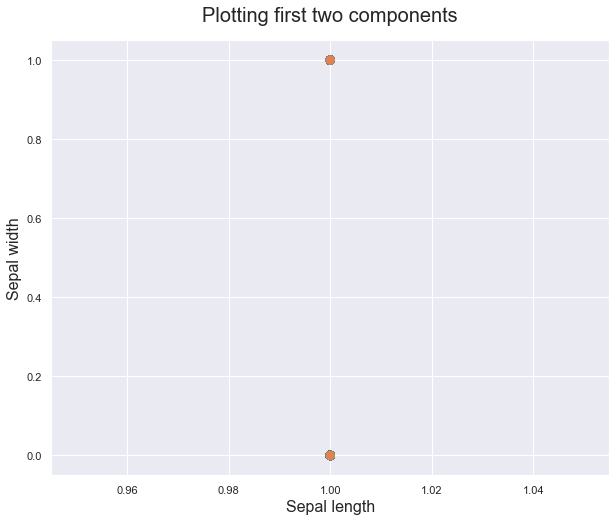

In [79]:
plot_ludeme_2d(
    x = df['String_java.lang.String'].values,
    y = df['Off_int'].values,
    title = 'Plotting first two components',
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

In [90]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]

In [91]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.12917672 0.10842148]


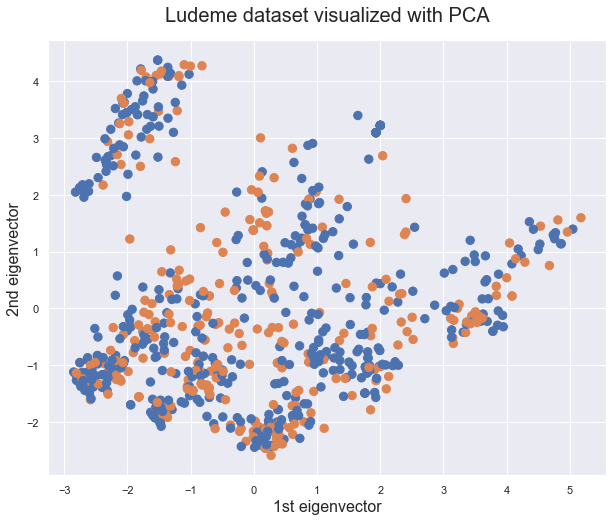

In [92]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="pca-one", y="pca-two",
#     hue="y",
#     palette=sns.color_palette("hls", 10),
#     data=X,
#     legend="full",
#     alpha=0.3
# )

plot_ludeme_2d(
    x = pca_result[:,0],
    y = pca_result[:,1],
    title = 'Ludeme dataset visualized with PCA')

In [146]:
tsne = TSNE(n_components=2, metric="euclidean", init='pca', random_state=RANDOM_STATE, learning_rate=200.0, perplexity=30.0)
points = tsne.fit_transform(X)

In [97]:
df['pca-one'] = points[:,0]
df['pca-two'] = points[:,1] 

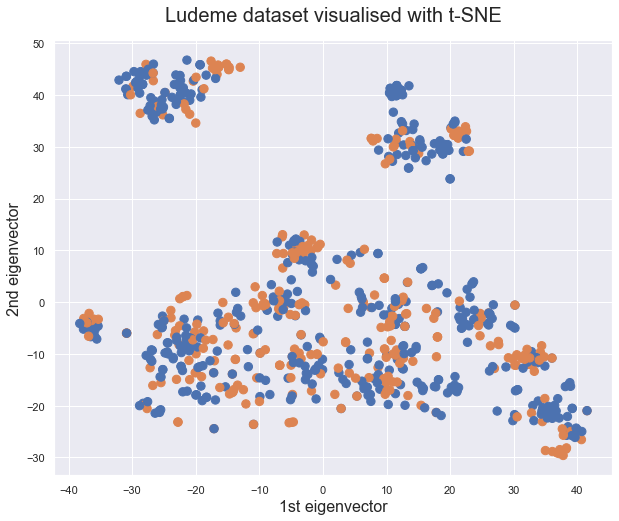

In [89]:
plot_ludeme_2d(
    x = points[:, 0],
    y = points[:, 1], title = 'Ludeme dataset visualised with t-SNE')

In [152]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose = 1, n_iter=5000, random_state=RANDOM_STATE)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 766 samples in 0.001s...
[t-SNE] Computed neighbors for 766 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 766 / 766
[t-SNE] Mean sigma: 2.075949
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.200214
[t-SNE] KL divergence after 2900 iterations: 0.528980
t-SNE done! Time elapsed: 10.579639911651611 seconds


<AxesSubplot:>

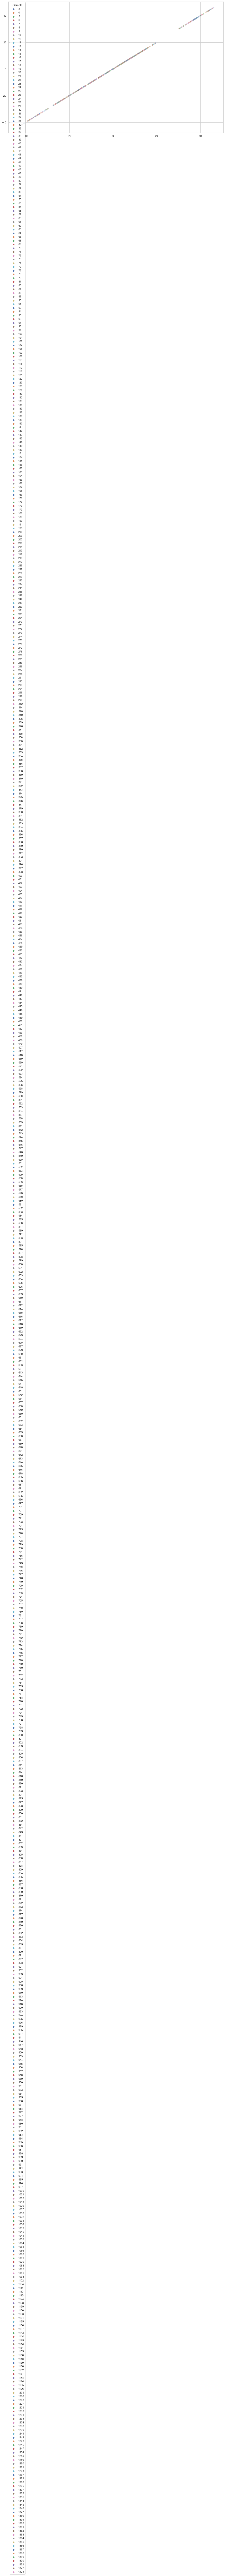

In [165]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x= tsne_results[:,0], y=tsne_results[:,0],
#     hue=firstColumn,
#     palette=("deep"),
#     data=X,
#     legend="full",
#     alpha=0.3
# )



## 3D plotting

### With PCA

In [134]:
pca = PCA(n_components=3)
points = pca.fit_transform(X)
df['pca-one'] = points[:,0]
df['pca-two'] = points[:,1]

<AxesSubplot:>

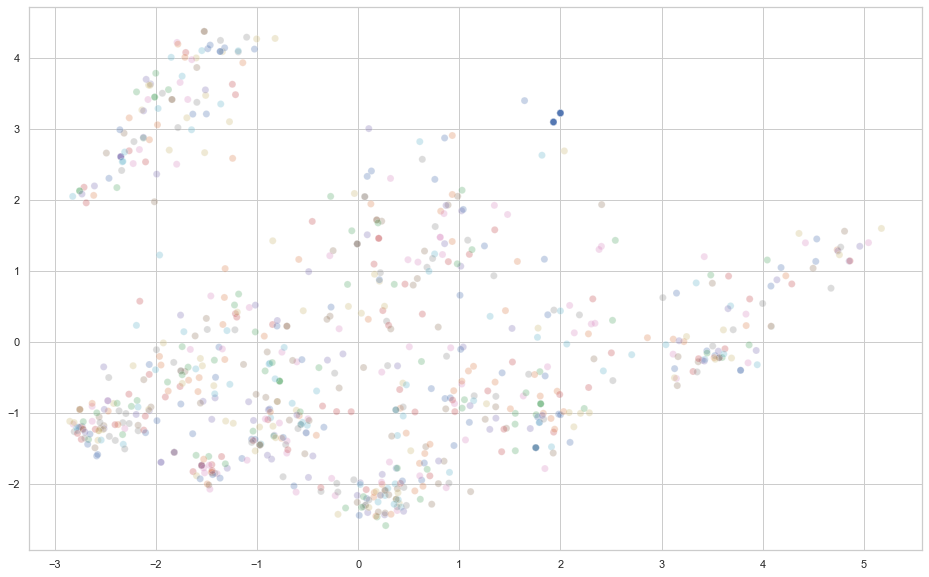

In [138]:

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=points[:,0], y = points[:,1],
    hue = firstColumn,
    palette = ("deep"),
    s =50,
    data=X,
    legend = None,
    alpha=0.3
)

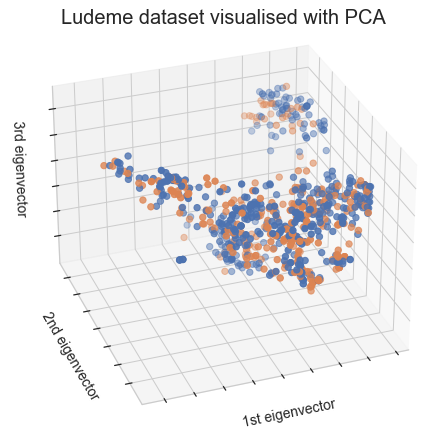

In [139]:
plot_ludeme_3d(
    x = points[:,0], y = points[:,1], z = points[:,2],
    title = "Ludeme dataset visualised with PCA"
)

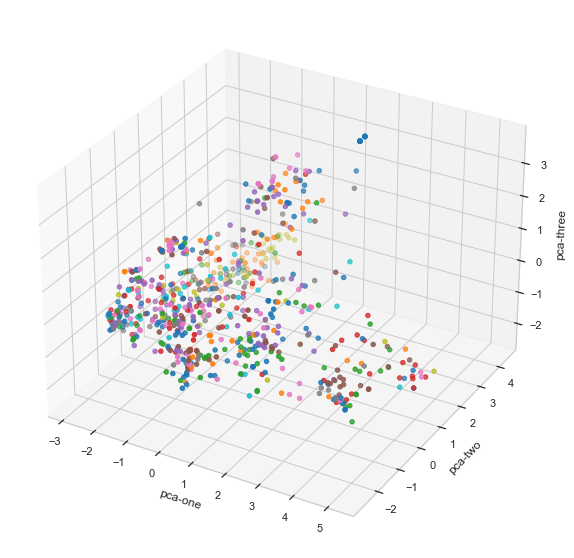

In [145]:
ax = plt.figure(figsize=(16,10)).gca(projection = '3d')
ax.scatter(xs = points[:,0], ys = points[:,1], zs = points[:,2],
c = firstColumn,
cmap = 'tab10')
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### With t-SNE
From the graph we can see the two components definitely hold some information, especially for specific digits, but clearly not enough to set all of them apart. Luckily there is another technique that we can use to reduce the number of dimensions that may prove more helpful. In the next few paragraphs we are going to take a look at that technique and explore if it gives us a better way of reducing the dimensions for visualisation. The method we will be exploring is known as t-SNE (t-Distributed Stochastic Neighbouring Entities).

In [148]:
import time
time_start = time.time()
tsne = TSNE(n_components=3, verbose = 1, n_iter=5000, random_state=RANDOM_STATE)
points = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 766 samples in 0.001s...
[t-SNE] Computed neighbors for 766 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 766 / 766
[t-SNE] Mean sigma: 2.075949
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.255638
[t-SNE] KL divergence after 5000 iterations: 0.581434
t-SNE done! Time elapsed: 44.82228398323059 seconds


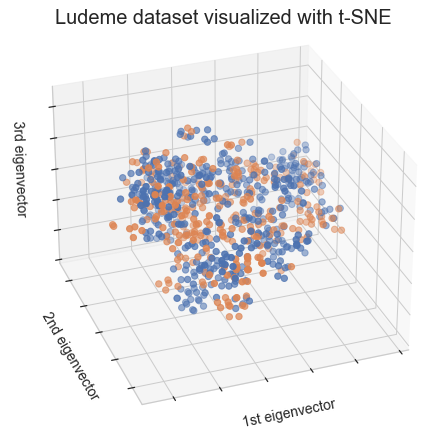

In [149]:
plot_ludeme_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Ludeme dataset visualized with t-SNE")